### [PPG2ABP: Translating Photoplethysmogram (PPG) Signals to Arterial Blood Pressure (ABP) Waveforms using Fully Convolutional Neural Networks](https://arxiv.org/pdf/2005.01669.pdf)

## Architecture
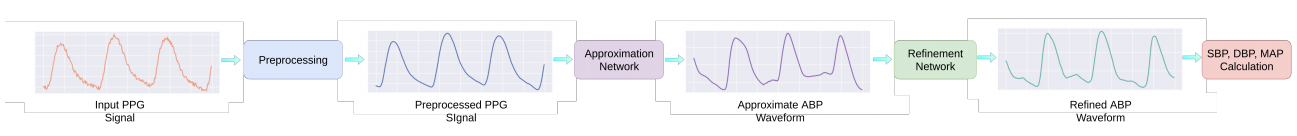

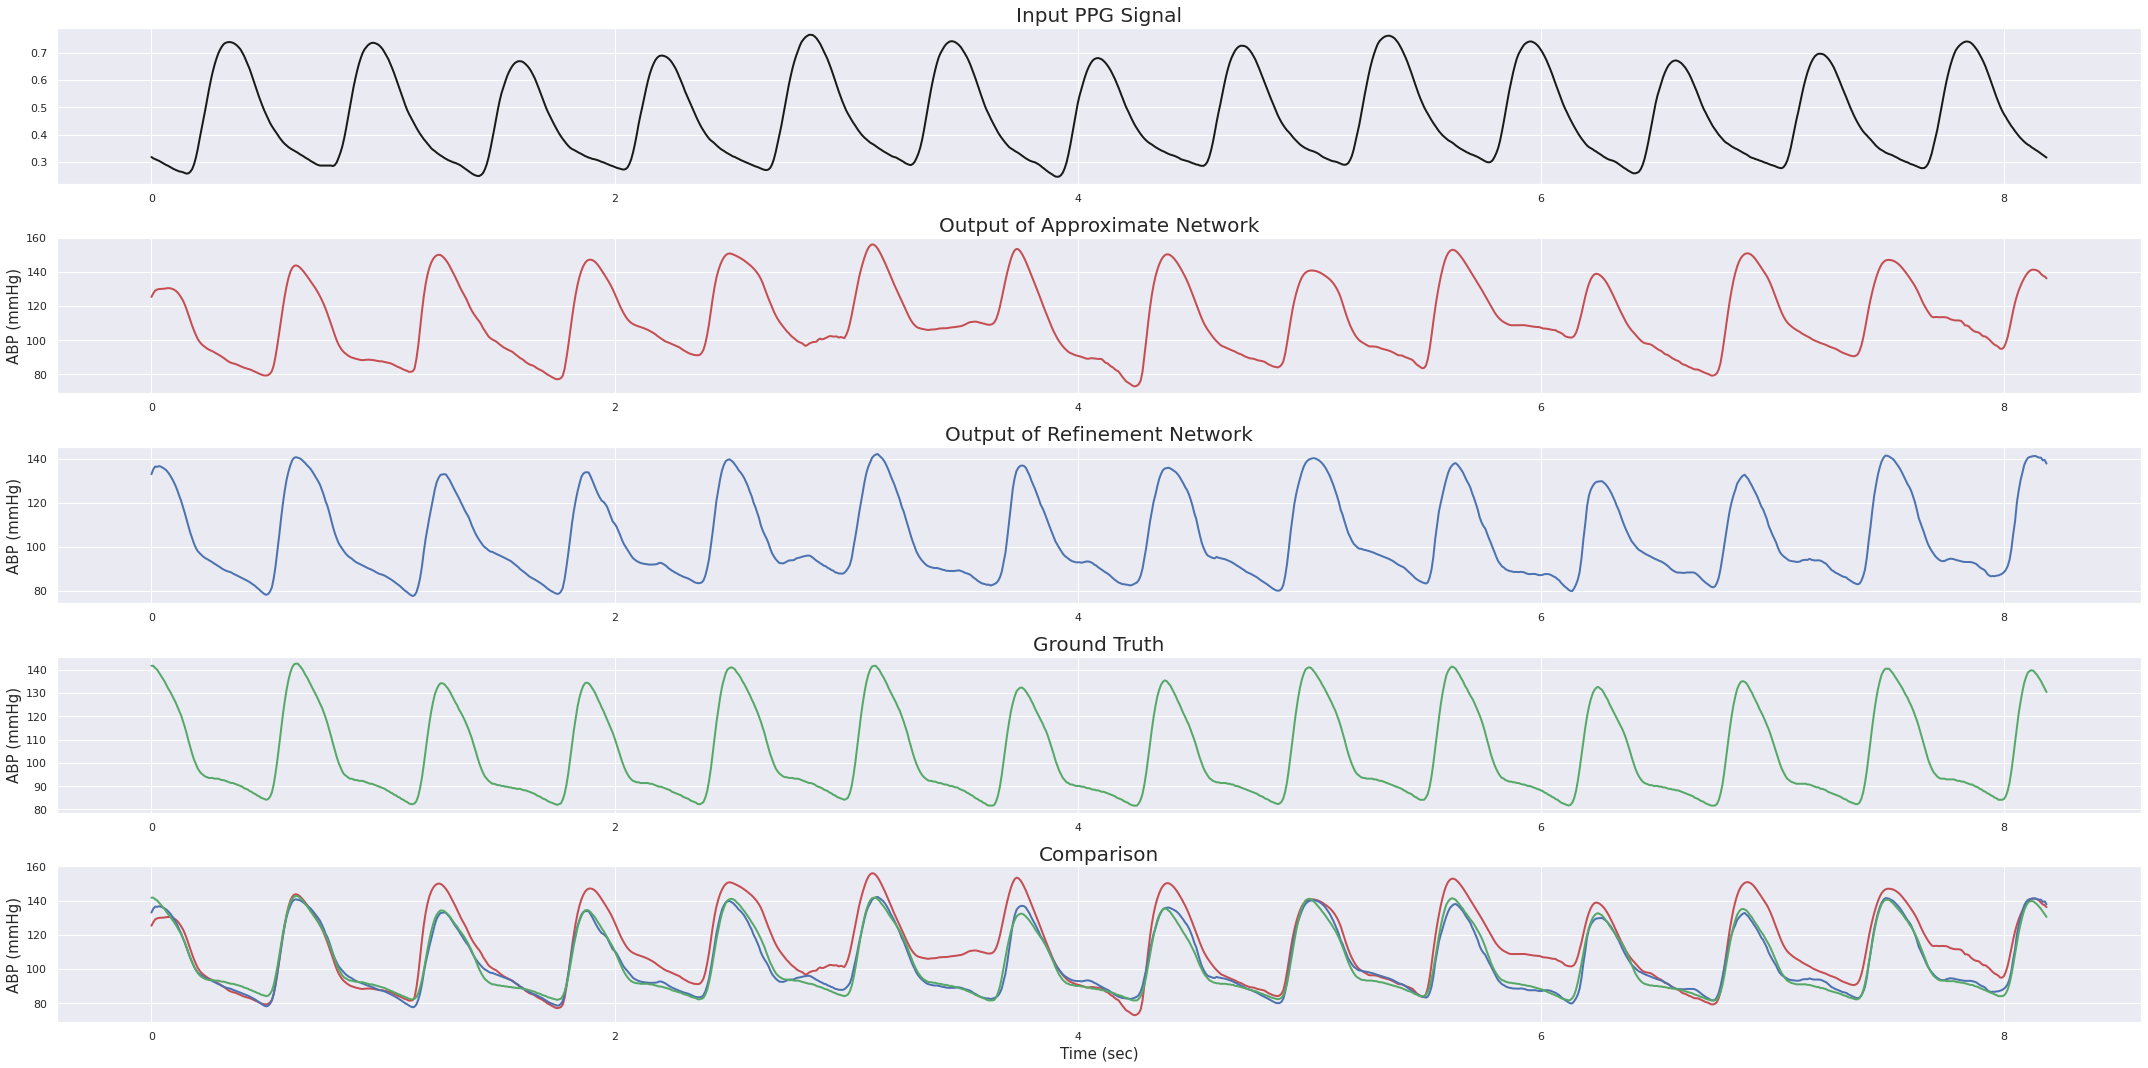

### Code: https://github.com/nibtehaz/PPG2ABP

### Notebook: [PPG2ABP.ipynb](https://github.com/nibtehaz/PPG2ABP/blob/master/codes/PPG2ABP.ipynb)

In [ ]:
!git clone https://github.com/nibtehaz/PPG2ABP

In [ ]:
import os
os.chdir('PPG2ABP/codes')

## 3. Handling Data

### Data: 
* ### raw_data https://archive.ics.uci.edu/ml/machine-learning-databases/00340/data.zip <br>
* ### [processed_data ](https://drive.google.com/file/d/1BzPBx4JZhf14lc84DiNZWyVwS7g5b1eK/view) (12000 of 10 seconds of SBP and DBP)
* ### [data.hdf5](https://drive.google.com/file/d/1GtsQgPP_gEdeTJHws_O9zL8BviUBWfEO/view?usp=sharing)

In [ ]:
os.mkdir('data')

In [ ]:
#!cp '/kaggle/input/ppg2abp-data/data.hdf5' data
!ln -s '/kaggle/input/ppg2abp-data/data.hdf5' data/data.hdf5

In [ ]:
!ls data

In [ ]:
from data_handling import fold_data


fold_data()

## 4. Training Models


### 4A. Training Approximation Network
├── raw_data <br>
├── data <br>
├── History <br>
├── models <br>
│ └── UNetDS64_model1_fold0.h5 <br>
│ ├── UNetDS64_model1_fold1.h5 <br>
│ ├── ... <br>
│ └── UNetDS64_model1_fold9.h5 <br>
└ ... <br>

In [ ]:
from helper_functions import *
from models import *

In [ ]:
from train_models import train_approximate_network

train_approximate_network()

### 4B. Training Refinement Network
├── raw_data <br>
├── data <br>
├── History <br>
├── models <br>
│ ├── MultiResUNet1D_model2_fold0.h5 <br>
│ ├── MultiResUNet1D_model2_fold1.h5 <br>
│ ├── ... <br>
│ ├── MultiResUNet1D_model2_fold9.h5 <br>
│ ├── UNetDS64_model1_fold0.h5 <br>
│ ├── UNetDS64_model1_fold1.h5 <br>
│ ├── ... <br>
│ └── UNetDS64_model1_fold9.h5 <br>
└ ... <br>

In [ ]:
from train_models import train_refinement_network

train_refinement_network()

### 4C. Selecting the Best Model
The models can be found in the following links *ApproximateNetwork.h5* and *RefinementNetwork.h5* <br>
├── raw_data <br>
├── data <br>
├── History <br>
├── models <br>
│ ├── ApproximateNetwork.h5 <br>
│ ├── RefinementNetwork.h5 <br>
│ └── ... <br>
└ ... <br>

## 5. Generate Predictions on Test Data

In [ ]:
from predict_test import predict_test_data

predict_test_data()

## 6. Evaluation

### 6A. Evaluation of Predicting ABP Waveforms

In [ ]:
from evaluate import predicting_ABP_waveform

predicting_ABP_waveform()

### 6B. Evaluation of BHS Standard
Here, we evaluate PPG2ABP based on BHS Standard Metric

In [ ]:
from evaluate import evaluate_BHS_Standard

evaluate_BHS_Standard()

### 6C. Evaluation of AAMI Standard
Here, we evaluate PPG2ABP under AAMI Standard

In [ ]:
from evaluate import evaluate_AAMI_Standard

evaluate_AAMI_Standard()

### 6D. Evaluation of BP Classification Accuracy
Here, we evaluate PPG2ABP for BP Classification

In [ ]:
from evaluate import evaluate_BP_Classification

evaluate_BP_Classification()

### 6E. Bland Altman Plot
Here we draw the Bland Altman Plot for PPG2ABP

In [ ]:
from evaluate import bland_altman_plot

bland_altman_plot()